# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

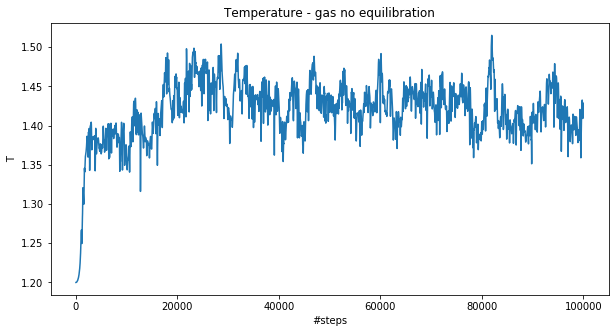

In [3]:
data_temp = np.loadtxt("04.1/noequil_gas_temp.dat")
plt.figure(figsize=(10,5))
plt.plot(data_temp)
plt.xlabel("#steps")
plt.title("Temperature - gas no equilibration")
plt.ylabel("T")
plt.show()

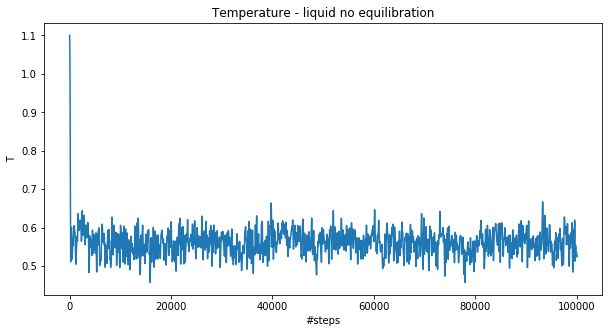

In [4]:
data_temp = np.loadtxt("04.1/noequil_liquid_temp.dat")
plt.figure(figsize=(10,5))
plt.plot(data_temp)
plt.xlabel("#steps")
plt.title("Temperature - liquid no equilibration")
plt.ylabel("T")
plt.show()

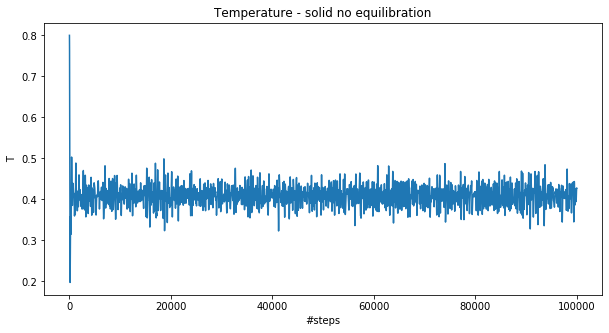

In [5]:
data_temp = np.loadtxt("04.1/noequil_solid_temp.dat")
plt.figure(figsize=(10,5))
plt.plot(data_temp)
plt.xlabel("#steps")
plt.title("Temperature - solid no equilibration")
plt.ylabel("T")
plt.show()

As it can be seen from the previous graphs without any equilibration process the temperature of the system after some steps is different from the initial one.

I have added the possibility to start from the previuos configuration (that must be copied from config.final to config.0) by setting to 1 the boolean variable <font face="Courier">start_with_old</font></span> in the file <font face="Courier">input.dat</font></span>.
I have added the possibility to rescale the initial temperature by setting to 1 the boolean variable <font face="Courier">rescale_temp_bool</font></span> in the file <font face="Courier">input.dat</font></span> and setting the new temperature in <font face="Courier">desired_temp</font></span>.

This turns to be useful for the equilibration of the different phases. The gas one is equilibrated starting from a temperature smaller than the equilibrium temperature. Then the simulation is interrupted and restarted imponing a temperature quite different from the desired temperature. The liquid and the solid phases are equilibrated similarly, but starting from a higher temperature (about twice the desired temperature). Therefore:
- **Solid**: $10000$ steps starting at $T = 1.6$ then rescaling at $T = 0.738$ 
- **Liquid**: $10000$ steps starting at $T = 2.0$ then rescaling at $T = 1.1$
- **Gas**: $10000$ steps starting at $T = 1.0$ then rescaling at $T = 1.175$

After the equilibration process the temperature at which the simulation is run is about our desired temperature. The graphs representing this are shown below in Exercise 04.2.

#### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

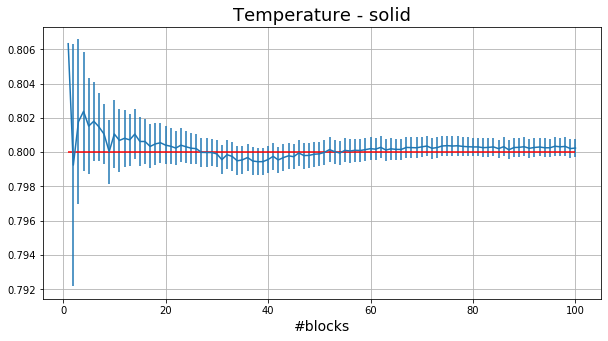

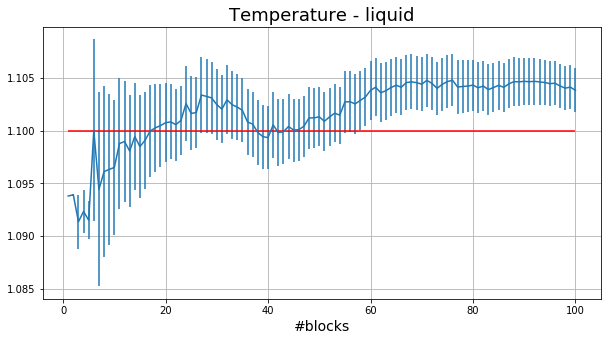

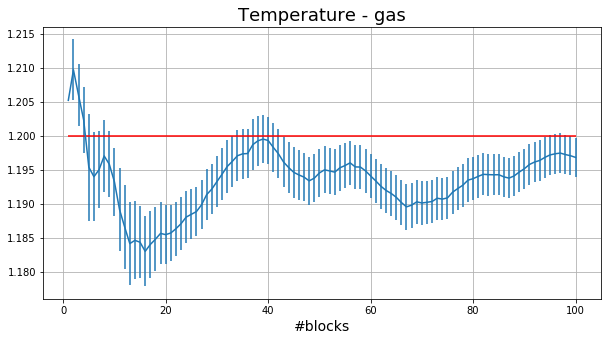

In [6]:
data = np.loadtxt("MolecularDynamics_NVE/results/solid_temp.out")
plt.figure(figsize=(10,5))
plt.errorbar(data[:,0], data[:,2], yerr = data[:,3])
plt.hlines(0.8, data[0,0], data[-1,0], color='red')
plt.title(r'Temperature - solid', fontsize =18)
plt.xlabel("#blocks", fontsize =14)
plt.grid(True)
plt.show()

data = np.loadtxt("MolecularDynamics_NVE/results/liquid_temp.out")
plt.figure(figsize=(10,5))
plt.errorbar(data[:,0], data[:,2], yerr = data[:,3])
plt.hlines(1.1, data[0,0], data[-1,0], color='red')
plt.title(r'Temperature - liquid', fontsize =18)
plt.xlabel("#blocks", fontsize =14)
plt.grid(True)
plt.show()

data = np.loadtxt("MolecularDynamics_NVE/results/gas_temp.out")
plt.figure(figsize=(10,5))
plt.errorbar(data[:,0], data[:,2], yerr = data[:,3])
plt.hlines(1.2, data[0,0], data[-1,0], color='red')
plt.title(r'Temperature - gas', fontsize =18)
plt.xlabel("#blocks", fontsize =14)
plt.grid(True)
plt.show()

I have shown only the graphs relative to the temperature so that it can be checked the correct corrispondence between the desired temperature and the effective temperature. The data are at most $3\sigma$-compatible.

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

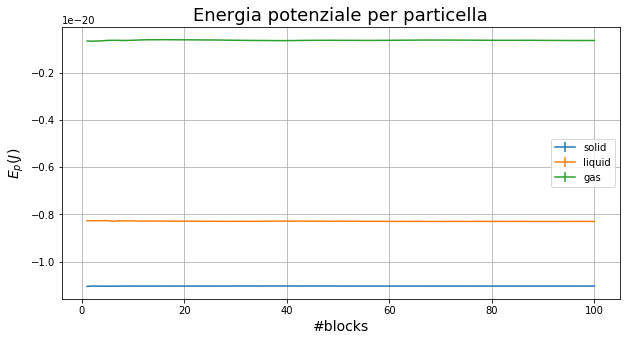

In [13]:
sigma = 0.34e-9
T = 120
m = 39.948 * 1.66e-27
k = 1.38e-23

data_solid = np.loadtxt("MolecularDynamics_NVE/results/solid_epot.out")

data_liquid = np.loadtxt("MolecularDynamics_NVE/results/liquid_epot.out")

data_gas = np.loadtxt("MolecularDynamics_NVE/results/gas_epot.out")

plt.figure(figsize=(10,5))

plt.errorbar(data_solid[:,0], data_solid[:,2]*k*T, 
             yerr = data_solid[:,3]*k*T, label = "solid")
plt.errorbar(data_liquid[:,0], data_liquid[:,2]*k*T, 
             yerr = data_liquid[:,3]*k*T, label = "liquid")
plt.errorbar(data_gas[:,0], data_gas[:,2]*k*T, 
             yerr = data_gas[:,3]*k*T, label = "gas")

plt.title(r'Energia potenziale per particella', fontsize = 18)
plt.ylabel(r'$E_p (J)$', fontsize = 14)
plt.xlabel("#blocks", fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()

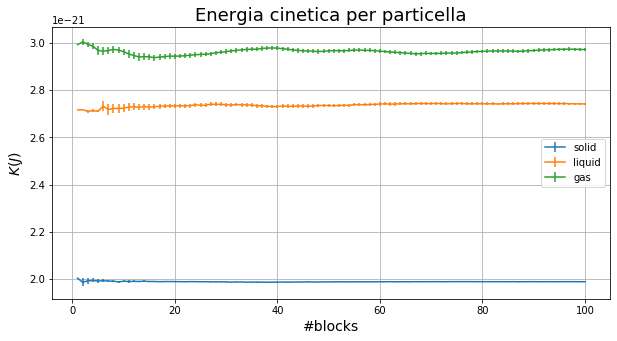

In [14]:
data_solid = np.loadtxt("MolecularDynamics_NVE/results/solid_ekin.out")

data_liquid = np.loadtxt("MolecularDynamics_NVE/results/liquid_ekin.out")

data_gas = np.loadtxt("MolecularDynamics_NVE/results/gas_ekin.out")

plt.figure(figsize =(10,5))
plt.errorbar(data_solid[:,0], data_solid[:,2]*k*T, 
             yerr = data_solid[:,3]*k*T, label = "solid")
plt.errorbar(data_liquid[:,0], data_liquid[:,2]*k*T, 
             yerr = data_liquid[:,3]*k*T, label = "liquid")
plt.errorbar(data_gas[:,0], data_gas[:,2]*k*T, 
             yerr = data_gas[:,3]*k*T, label = "gas")

plt.title(r'Energia cinetica per particella', fontsize = 18)
plt.ylabel(r'$K (J)$', fontsize = 14)
plt.xlabel("#blocks", fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()

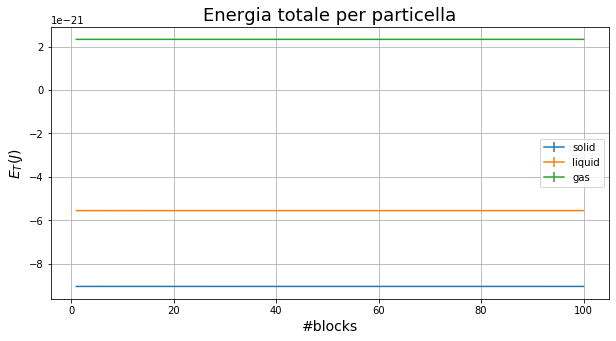

In [15]:
data_solid = np.loadtxt("MolecularDynamics_NVE/results/solid_etot.out")

data_liquid = np.loadtxt("MolecularDynamics_NVE/results/liquid_etot.out")

data_gas = np.loadtxt("MolecularDynamics_NVE/results/gas_etot.out")

plt.figure(figsize=(10,5))
plt.errorbar(data_solid[:,0], data_solid[:,2]*k*T, 
             yerr = data_solid[:,3]*k*T, label = "solid")
plt.errorbar(data_liquid[:,0], data_liquid[:,2]*k*T, 
             yerr = data_liquid[:,3]*k*T, label = "liquid")
plt.errorbar(data_gas[:,0], data_gas[:,2]*k*T, 
             yerr = data_gas[:,3]*k*T, label = "gas")

plt.title(r'Energia totale per particella',fontsize = 18)
plt.ylabel(r'$E_T (J)$', fontsize = 14)
plt.xlabel("#blocks", fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()

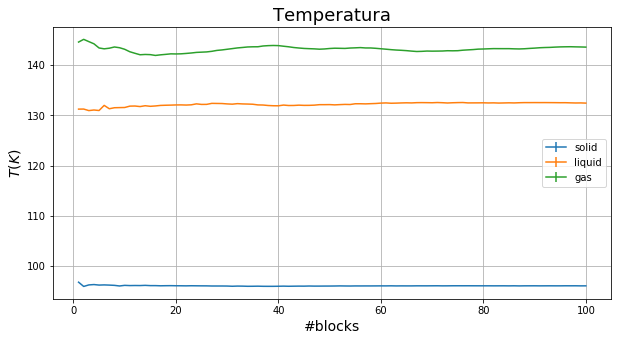

In [16]:
data_solid = np.loadtxt("MolecularDynamics_NVE/results/solid_temp.out")


data_liquid = np.loadtxt("MolecularDynamics_NVE/results/liquid_temp.out")

data_gas = np.loadtxt("MolecularDynamics_NVE/results/gas_temp.out")

plt.figure(figsize=(10,5))
plt.errorbar(data_solid[:,0], data_solid[:,2]*T, 
             yerr = data_solid[:,3]*k*T, label = "solid")
plt.errorbar(data_liquid[:,0], data_liquid[:,2]*T, 
             yerr = data_liquid[:,3]*k*T, label = "liquid")
plt.errorbar(data_gas[:,0], data_gas[:,2]*T, 
             yerr = data_gas[:,3]*k*T, label = "gas")

plt.title(r'Temperatura', fontsize = 18)
plt.ylabel(r'$T (K)$', fontsize = 14)
plt.xlabel("#blocks", fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$